<a href="https://colab.research.google.com/github/laynejohnson13/introR/blob/main/IntroRtutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext rpy2.ipython

In [3]:
%%R
sessionInfo()

R version 4.2.1 (2022-06-23)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas/liblapack.so.3

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

loaded via a namespace (and not attached):
[1] compiler_4.2.1


In [5]:
%%R
getwd()

[1] "/content"


In [8]:
%%R
library()
citation()


To cite R in publications use:

  R Core Team (2022). R: A language and environment for statistical
  computing. R Foundation for Statistical Computing, Vienna, Austria.
  URL https://www.R-project.org/.

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {R: A Language and Environment for Statistical Computing},
    author = {{R Core Team}},
    organization = {R Foundation for Statistical Computing},
    address = {Vienna, Austria},
    year = {2022},
    url = {https://www.R-project.org/},
  }

We have invested a lot of time and effort in creating R, please cite it
when using it for data analysis. See also ‘citation("pkgname")’ for
citing R packages.



In [9]:
%%R
a <- c(33, 44, 92, 58)      
length(a)
sum(a)
median(a)  ;  mad(a)
ls()                       
class(a)                    
str(a)                      
summary(a)

 num [1:4] 33 44 92 58
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33.00   41.25   51.00   56.75   66.50   92.00 


In [11]:
%%R
a                          
cat('Sum of ', length(a), ' elements in the vector a = ', sum(a), '\n')

write(file='output', a)     
save(file='output_bin', a)  
save(file='output_bin', a) 

Sum of  4  elements in the vector a =  227 


In [13]:
%%R
a[1:4]          
a[3]            
a > 40          
sum(a[a>40])    
which.max(a)    
match(44, a)

[1] 2


In [15]:
%%R
d <- data.frame(cbind(seq(1:4), a, a^3))  # Bind columns into data frame
class(d)
names(d) <- c('ID', 'a', 'a_cubed') # Column names for data frame                                         
d2 <- d[-4,-1]                            # Remove 4th row and 1st column
d ; d2
write.table(d, file='d.txt', quote=FALSE, row.names=FALSE)

In [16]:
%%R
b_list <- list(star=c('Sirius', 'Procyon'), SpTy=c('O','B','A'), Hubble_km.s=68)
str(b_list)
b_list[['SpTy']] = list(subtype=seq(0.1:0.9, by=0.1))
str(b_list)
b_list$SpTy$subtype[1:3]

List of 3
 $ star       : chr [1:2] "Sirius" "Procyon"
 $ SpTy       : chr [1:3] "O" "B" "A"
 $ Hubble_km.s: num 68
List of 3
 $ star       : chr [1:2] "Sirius" "Procyon"
 $ SpTy       :List of 1
  ..$ subtype: num [1:10] 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1
 $ Hubble_km.s: num 68
[1] 0.1 0.2 0.3


In [17]:
%%R
5 + 10003
5-3 ; 5*3 ; 5/3 ; 5^3
x <- 5 ; y <- 3
x+y 

[1] 8


In [18]:
%%R
sin(0)  ; sin(pi/2)         # note angles are in radians
ang <- seq(0, pi/2, length=30) 
sin(ang)

 [1] 0.00000000 0.05413891 0.10811902 0.16178200 0.21497044 0.26752834
 [7] 0.31930153 0.37013816 0.41988910 0.46840844 0.51555386 0.56118707
[13] 0.60517422 0.64738628 0.68769946 0.72599549 0.76216206 0.79609307
[19] 0.82768900 0.85685718 0.88351204 0.90757542 0.92897672 0.94765317
[25] 0.96354999 0.97662056 0.98682652 0.99413796 0.99853341 1.00000000


In [19]:
%%R
trunc(12345.6789) ; round(12345.6789)  
format(12345.6789, digits=2, scientific=TRUE)   

log(20)  ;  log10(20)

[1] 1.30103


In [20]:
%%R
z <- seq(0.0, 0.5, 0.1)
z
H_0 <- 68  	 		               	# km/s/Mpc,  Planck value
speed.light <- 3.0E5          	# km/s
dist <- speed.light*z / H_0     # in Mpc
dist
class(dist)

[1] "numeric"


In [21]:
%%R
Omega_m <- (0.022068 + 0.12029) / (H_0/100)^2    
Omega_Lambda <- 0.6825                    # Planck satellite values

E.H0 <- function(redshift) {sqrt(Omega_m*(1+redshift)^3 + Omega_Lambda)}

lum.dist <- function(redshift) {  
	luminosity.distance = (speed.light/H_0) * integrate(E.H0, 0, redshift)$value 
	return(luminosity.distance)  }

distGR <- Vectorize(lum.dist)(z)

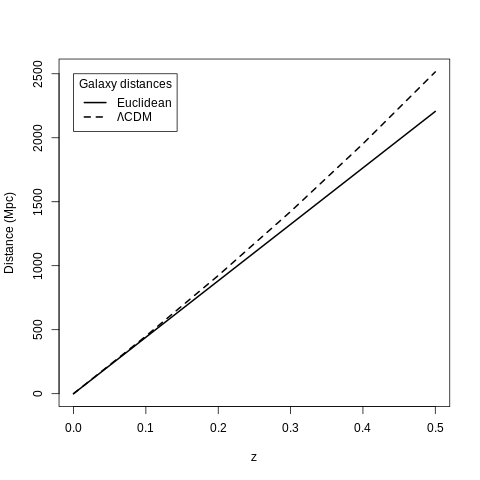

In [22]:
%%R
options(jupyter.plot_scale=1)
options(repr.plot.width = 7, repr.plot.height = 5)

plot(z, distGR, type='l', lty=2, lwd=2, ylab='Distance (Mpc)')
lines(z, dist, lty=1, lwd=2)   
legend(0.0, 2500, lty=c(1,2), lwd=c(2,2), title='Galaxy distances', 
     	legend=c('Euclidean', expression(Lambda*CDM)))

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp7baePp/downloaded_packages’


Attaching package: ‘NADA’



    cor




Formal class 'cenfit' [package "NADA"] with 1 slot
  ..@ survfit:List of 16
  .. ..$ n        : int 12
  .. ..$ time     : num [1:12] 43 42.9 42.3 41.7 41.6 41.2 41.1 40.7 40.6 40.2 ...
  .. ..$ n.risk   : num [1:12] 12 11 10 9 8 7 6 5 4 3 ...
  .. ..$ n.event  : num [1:12] 1 0 1 1 1 0 1 0 1 1 ...
  .. ..$ n.censor : num [1:12] 0 1 0 0 0 1 0 1 0 0 ...
  .. ..$ surv     : num [1:12] 0.917 0.917 0.825 0.733 0.642 ...
  .. ..$ std.err  : num [1:12] 0.087 0.087 0.137 0.18 0.225 ...
  .. ..$ cumhaz   : num [1:12] 0.0833 0.0833 0.1833 0.2944 0.4194 ...
  .. ..$ std.chaz : num [1:12] 0.0833 0.0833 0.1302 0.1711 0.2119 ...
  .. ..$ type     : chr "right"
  .. ..$ logse    : logi TRUE
  .. ..$ conf.int : num 0.95
  .. ..$ conf.type: chr "plain"
  .. ..$ lower    : num [1:12] 0.76 0.76 0.604 0.474 0.359 ...
  .. ..$ upper    : num [1:12] 1 1 1 0.993 0.924 ...
  .. ..$ call     : language survfit(formula = flip(obs), conf.type = conf.type)
  .. ..- attr(*, "class")= chr "survfit"
[1] 1.19326


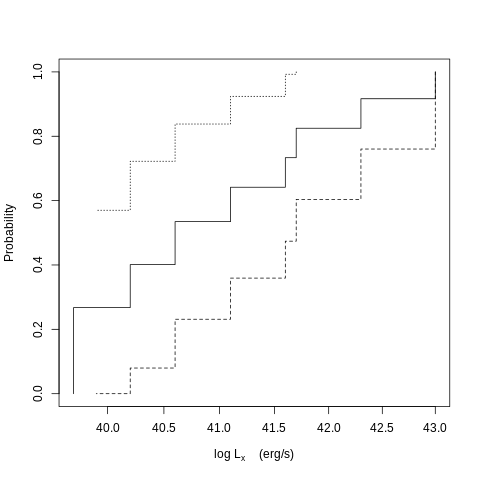

In [23]:
%%R
install.packages('NADA')
library(NADA)

help(cenfit)
galLx <- c(39.7, 42.3, 41.7, 41.6, 43.0, 40.2, 40.6, 41.1, 39.9, 40.7, 41.2, 42.9)
cens <- c(F,F,F,F,F,F,F,F, T,T,T,T)  # FALSE=detected TRUE=left-censored. 
galKM <- cenfit(galLx, cens)
str(galKM)   # The help(cenfit) should describe this output but does not!  

summary(galKM)  # display KM estimator on console
plot(galKM, xlab=expression("log L"[x]~~"(erg/s)"))     # plot KM estimator with 95% confidence band
quantile(galKM) # median and other quantiles
mean(galKM)  ;  sd(galKM)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2424  0.8173  0.9772  1.0224  1.1093  2.4776 


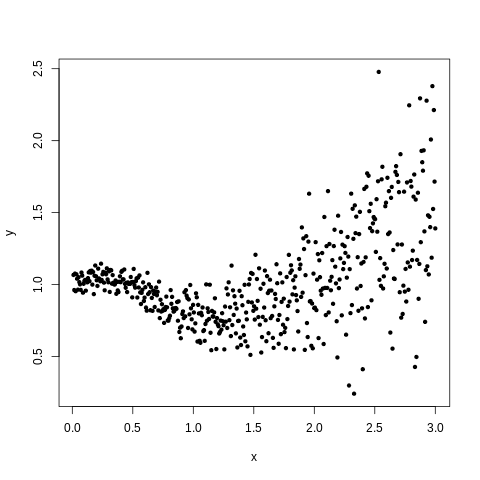

In [24]:
%%R
set.seed(1)
x <- sample(seq(0.01, 3, length.out=500))
y <- 0.5*x + 0.3^(x^2) + rnorm(500, mean=0, sd=(0.05*(1+x^2)))
xy <- cbind(x, y)

plot(xy, pch=20)
summary(x) ; summary(y) 

  can only print from a screen device




Error in dev.copy2pdf(file = "box.pdf") : 
  can only print from a screen device


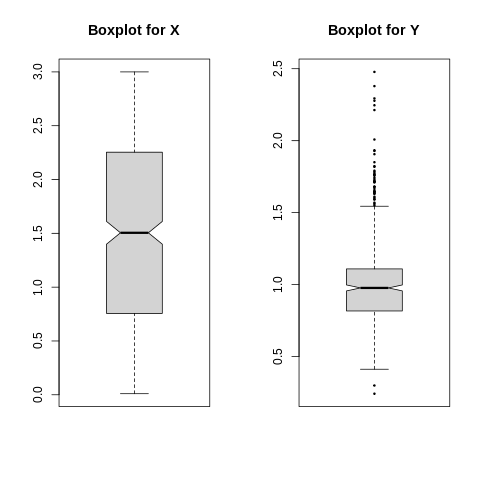

RInterpreterError: ignored

In [25]:
%%R
par(mfrow=c(1,2))  		# Set up a two-panel figure
boxplot(x,  notch=T, main='Boxplot for X')  # See help(boxplot.stats) for explanation
boxplot(y,  notch=T, pch=20, cex=0.5, main='Boxplot for Y')
dev.copy2pdf(file='box.pdf')

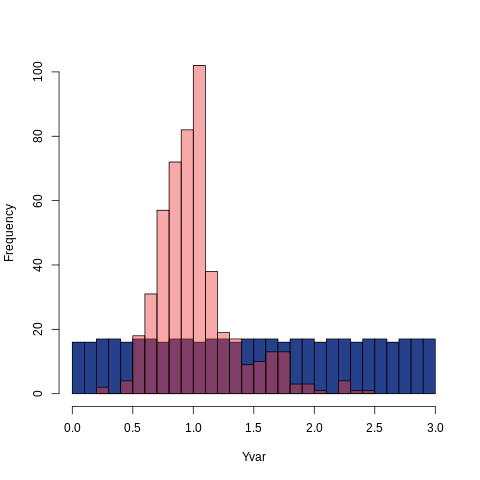

In [26]:
%%R
par(mfrow=c(1,1))
hist(x, breaks=30, main='', xlim=range(x), ylim=c(0,100), 
     xlab='Yvar', col='royalblue4')
hist(y, breaks=30, main='', xlab='Yvar', 
     col='#ee3b3b70', add=TRUE)

  can only print from a screen device




Error in dev.copy2pdf(file = "ecdf.pdf") : 
  can only print from a screen device


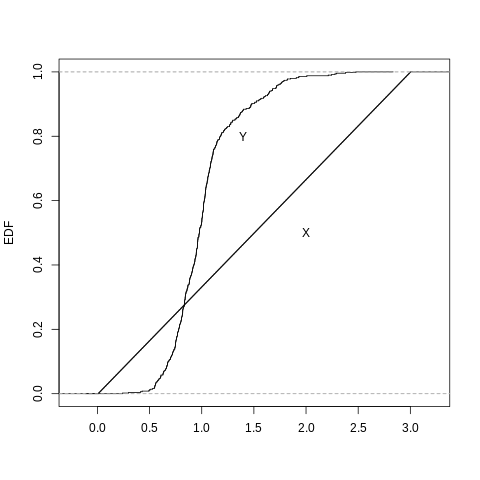

RInterpreterError: ignored

In [30]:
%%R
plot(ecdf(x), pch=20, cex=0.0, verticals=TRUE, main='',ylab='EDF',xlab='')  
plot(ecdf(y), pch=20, cex=0.0, verticals=TRUE, add=T)
text(2.0,0.5,"X") ; text(1.4,0.8,"Y")             # text adds annotation within a plot
dev.copy2pdf(file='ecdf.pdf')

In [31]:
%%R
xy <- cbind(x, y)  ;  str(xy) 	

# A data.frame associates names to the columns

xy <- as.data.frame(xy)         
names(xy) <- c('Xvar', 'Yvar')  

# Collect rows where the first column value exceeds 2

high_x1 <- xy[xy[,1]>2,]        
high_x2 <- subset(xy, xy[,1]>2)	# Another way to extract rows
setequal(high_x1, high_x2)

 num [1:500, 1:2] 1.945 1.005 0.777 2.509 2.826 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:2] "x" "y"
[1] TRUE


In [32]:
%%R
trials <- sample.int(length(xy[,1]),20) # 20 random rows
xy[trials,]	

# 20 bootstrap resamples

trials <- sample.int(length(xy[,1]),20, replace=T) 
xy[trials,]	

# Estimate the standard error of the median of Yvar

median(xy[,2]) 

# Median absolute deviation estimate of median s.e.

mad(xy[,2]) / sqrt(500)	

[1] 0.01025085


Attaching package: ‘boot’



    aml




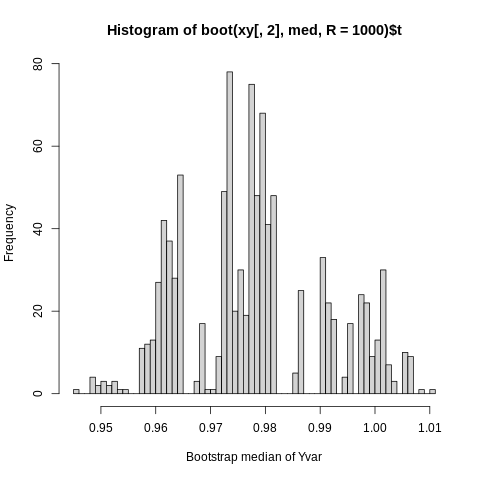

In [33]:
%%R
library(boot)  			# The following function in a base-R library
med <- function(x,index){ median(x[index]) }

# Read help(boot) to understand its output list structure

boot(xy[,2], med, R=1000) # Bootstrap estimate of median s.e. 
hist(boot(xy[,2], med, R=1000)$t, breaks=50, 
     xlab='Bootstrap median of Yvar')

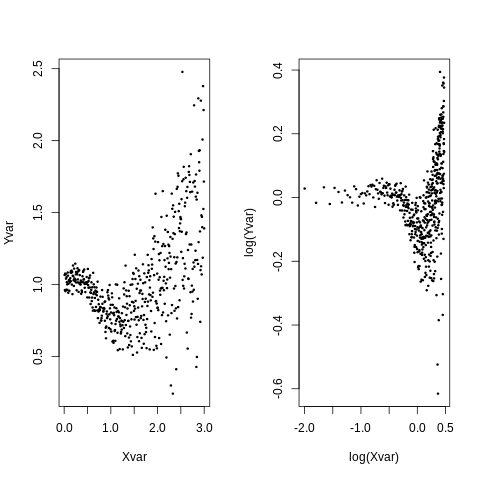

In [34]:
%%R
par(mfrow=c(1,2))
plot(xy, pch=20, cex=0.5)	 
plot(log10(xy), pch=20, cex=0.5, xlab='log(Xvar)', ylab='log(Yvar)')

In [35]:
%%R
length(x[x>2])		# State length of a vector.  Use `dim' for an array or data.frame.
# Parametric hypothesis test for bivariate correlation 
cor.test(x[x>2],y[x>2], method='pearson')	
# Nonparametric hypothesis test for bivariate correlation
cor.test(x[x>2],y[x>2], method='kendall')	


	Kendall's rank correlation tau

data:  x[x > 2] and y[x > 2]
z = 5.1525, p-value = 2.571e-07
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.2685953 



In [36]:
%%R
# A list of the ~30 important CRAN packages embedded in the base-R environment
library()

# A full list of ~400 functions in R's `base' package
library(help = "base")

# Statistics in base R (~400 functions, tens-of-thousands more in CRAN and elsewhere in R)
library(help='stats')

# List current contents of your session environment
ls()

# Programming utilities including:
#    Use `source' to bring in external R scripts
#    Use `edit' to edit an R object
#    Use 'environment' to segregate a collection of objects
#    Functions `debug', `trace' and `browser' assist with code testing
#    Function 'process.events' allows low-level handling of R commands
library(help = 'utils')

# Loops:  for( i in 1:100) { ... }
# Program flow control:  if/else, ifelse, switch, while, repeat, next, break, stop
foo <- 2
if(foo == 1) cat('Hello world!') else cat('Do nothing')
for(i in 1:10) { cat(' Num = ', i, '\n') }

# Graphics and devices in base R (other packages in CRAN)
library(help='graphics')
library(help='grDevices')

# Parallel computing control in base R 
# CRAN has dozens of other high performance computing packages
library(help='parallel')

# Run an R script residing on disk
help(source)

# Save R objects (or your full environment) onto disk
help(save) ; help(load)

# Save or load history of R commands
help(savehistory)  ;  help(loadhistory)

# Connections, pipes, sockets, URLs, clipboard, compression, etc.
help(connections)
 
# Interact with host computer 
Sys.info()
system('ls -l')
system.time(fft(seq(0,1,length.out=1000000)))	# A million fast Fourier transforms

# Construct composite strings using 'paste'
# Extract postions of a string using `substring'
band_ir <- 'J'
paste('NGC1068',band_ir,'FITS', sep='.')

# FITS format reader/writer
install.packages('FITSio') ; library(FITSio)

# IDL Astro Library translated into R
install.packages('astrolibR') ; library(astrolibR)

Do nothing Num =  1 
 Num =  2 
 Num =  3 
 Num =  4 
 Num =  5 
 Num =  6 
 Num =  7 
 Num =  8 
 Num =  9 
 Num =  10 


(as ‘lib’ is unspecified)







	‘/tmp/Rtmp7baePp/downloaded_packages’

(as ‘lib’ is unspecified)




A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages 




Error in library(astrolibR) : there is no package called ‘astrolibR’


RInterpreterError: ignored